In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,609 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

In [8]:
from numpy import dot
from numpy.linalg import norm
import numpy as np

In [ ]:
### 한글 깨짐 해결 코드
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  
!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 155065 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [10]:
def test2(s):
  hangul = re.compile('[^ 0-9+.]')
  result = hangul.sub('', s) 
  return (result)

In [11]:
## 데이터 불러오고 null값 제거후 index정리
df = pd.read_csv('끝.csv',lineterminator='\n')
df = df[df['영화명'].notna()].reset_index()
## 불필요한 열
del df['index']
del df['Unnamed: 0']

###### 개봉일 날짜에서 월에 해당하는 부분만 꺼내 type을 정수로 변환시키고 계절로 분류시켰습니다
##### 나중에 더미변수로 활용 기대
month_list=[]
for i in range(len(df.개봉일)):
  try:
    if int(df.개봉일[i][-11:-7]) == 19 or int(df.개봉일[i][-11:-7]) == 20:
      if 3<=int(df.개봉일[i][-5:-3])<6:
        month_list.append('봄')
      elif 6<=int(df.개봉일[i][-5:-3])<9:
        month_list.append('여름')
      elif 9<=int(df.개봉일[i][-5:-3])<12:
        month_list.append('가을')
      else:
        month_list.append('겨울')
    else:
      if 3<=int(df.개봉일[i][-7:-5])<6:
        month_list.append('봄')
      elif 6<=int(df.개봉일[i][-7:-5])<9:
        month_list.append('여름')
      elif 9<=int(df.개봉일[i][-7:-5])<12:
        month_list.append('가을')
      else:
        month_list.append('겨울')
  except:
    month_list.append(None)

df['계절']=month_list

### 개봉년도를 column에 추가해 보겠습니다
year_list=[]
for i in range(len(df.개봉일)):
  try:
    x = int(df.개봉일[i][-11:-7])
    if x==19 or x == 20:
      x=df.개봉일[i][-9:-5]
    year_list.append(int(x))
  except:
    year_list.append(None)

df['개봉연도']=year_list
####
##### 추천 열에 해당하는 텍스트중에 필요한 정보들만 뽑아 새로운 column으로 만들겠습니다.
### 추천 텍스트에서 연령층
per_list=[]
for i in range(len(df.개봉일)):
  try:
    x = df['추천'][i][6:8]
    per_list.append(int(x))
  except:
    per_list.append(None)
df['추천_연령대']=per_list

### 추천 텍스트에서 성별
sex_list=[]
for i in range(len(df.개봉일)):
  try:
    x = df['추천'][i][10:12]
    sex_list.append(x)
  except:
    sex_list.append(None)
df['추천_성별']=sex_list

### 추천 텍스트에서 특징
spe_list=[]
for i in range(len(df.개봉일)):
  try:
    x = df['추천'][i][19:-12]
    spe_list.append(x)
  except:
    spe_list.append(None)
df['영화_특징']=spe_list

#### 불필요한 
del df['추천']

# 연령비율 형태 변경 '%'없애고 실수형으로 표시

a1_list=[]
a2_list=[]
a3_list=[]
a4_list=[]
a5_list=[]
for i in range(len(df['영화명'])):
    try:
      a1 = float(df['10대 비율'][i].replace('%',''))
    except:
      a1 = None
    try:
      a2 = float(df['20대 비율'][i].replace('%',''))
    except:
      a2 = None
    try:
      a3 = float(df['30대 비율'][i].replace('%',''))
    except:
      a3 = None
    try:
      a4 = float(df['40대 비율'][i].replace('%',''))
    except:
      a4 = None
    try:
      a5 = float(df['50대 비율'][i].replace('%',''))
    except:
      a5 = None
    a1_list.append(a1)
    a2_list.append(a2)
    a3_list.append(a3)
    a4_list.append(a4)
    a5_list.append(a5)
df['10대 비율']=a1_list
df['20대 비율']=a2_list
df['30대 비율']=a3_list
df['40대 비율']=a4_list
df['50대 비율']=a5_list


#### 남성 여성

b1_list=[]
b2_list=[]

for i in range(len(df['영화명'])):
    try:
      b1 = float(df['남성 만족도'][i])
    except:
      b1 = None
    try:
      b2 = float(df['여성 만족도'][i])
    except:
      b2 = None

    b1_list.append(b1)
    b2_list.append(b2)

df['남성 만족도']=b1_list
df['여성 만족도']=b2_list

##관람객 평점
##### 점수가 없는 것들은 ' ' 으로 되어있음
c1_list=[]

for i in range(len(df['영화명'])):
    try:
      c1 = float(test2(df['관람객평점'][i]))
    except:
      c1 = None
    c1_list.append(c1)
df['관람객평점']=c1_list

d1_list=[]

for i in range(len(df['영화명'])):
    try:
      d1 = float(df['관객평점인원'][i][3:-1])
    except:
      d1 = None
    d1_list.append(d1)
df['관객평점인원']=d1_list

e1_list=[]
for i in range(len(df['영화명'])):
    try:
      e1 = float(df['네티즌평점인원'][i][3:-1])
    except:
      e1 = None
    e1_list.append(e1)
df['네티즌평점인원']=e1_list
## 관객수 float화


In [ ]:
2004  2002 2050 2069 2075 2076 2077 2129 2125  .....  ######## 불량 데이터

In [ ]:
df

In [ ]:
df.describe()

,순위,관람객평점,관객평점인원,네티즌평점,네티즌평점인원,10대 비율,20대 비율,30대 비율,40대 비율,50대 비율,남성 만족도,여성 만족도,개봉연도,추천_연령대
count,1811.000000,1095.000000,2146.000000,2157.000000,2146.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,2166.000000,2166.000000,2152.000000,2166.000000
mean,3126.707896,8.838721,771.747437,8.626426,4266.169618,4.308676,45.389954,29.657534,14.887671,5.758904,8.274340,8.927415,2008.786245,19.806094
std,4327.281005,0.598046,2576.627222,0.585167,7416.617104,6.605055,20.727281,17.009745,11.188153,6.951277,0.867185,0.586321,9.363660,7.386354
min,1.000000,4.000000,0.000000,3.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.810000,1.900000,1949.000000,10.000000
25%,497.500000,8.530000,0.000000,8.360000,616.250000,0.000000,35.000000,21.000000,8.000000,1.000000,7.990000,8.650000,2004.000000,20.000000
50%,1893.000000,8.870000,1.000000,8.700000,1448.500000,3.000000,48.000000,27.000000,14.000000,4.000000,8.440000,9.030000,2011.000000,20.000000
75%,3427.000000,9.210000,224.500000,9.020000,4415.000000,5.000000,57.000000,35.000000,20.000000,7.000000,8.850000,9.310000,2016.000000,20.000000
max,18077.000000,10.000000,32116.000000,9.630000,94183.000000,50.000000,100.000000,100.000000,100.000000,100.000000,9.510000,10.000000,2021.000000,40.000000


In [ ]:
### 상관 관계를 보겠습니다
df.corr()

,순위,관람객평점,관객평점인원,네티즌평점,네티즌평점인원,10대 비율,20대 비율,30대 비율,40대 비율,50대 비율,남성 만족도,여성 만족도,개봉연도,추천_연령대
순위,1.000000,0.174012,-0.205047,0.194832,-0.294815,-0.004411,0.154851,-0.069017,-0.205916,0.033456,0.221840,0.135433,-0.393088,-0.007815
관람객평점,0.174012,1.000000,-0.054747,0.604663,-0.024573,0.073120,0.079490,-0.156141,-0.018847,0.108718,0.339338,0.530862,-0.219151,-0.086869
관객평점인원,-0.205047,-0.054747,1.000000,-0.085547,0.708236,-0.003894,0.014126,-0.038513,0.075860,-0.068129,-0.149916,-0.086817,0.227751,0.057381
네티즌평점,0.194832,0.604663,-0.085547,1.000000,-0.178712,0.078748,-0.022881,-0.018594,-0.005933,0.051810,0.760209,0.858987,-0.207085,-0.028012
네티즌평점인원,-0.294815,-0.024573,0.708236,-0.178712,1.000000,0.012159,0.097825,-0.109604,0.019121,-0.068830,-0.200722,-0.118196,0.197893,-0.082815
10대 비율,-0.004411,0.073120,-0.003894,0.078748,0.012159,1.000000,0.094951,-0.334015,-0.154247,-0.165113,-0.110872,0.087568,-0.043271,-0.312784
20대 비율,0.154851,0.079490,0.014126,-0.022881,0.097825,0.094951,1.000000,-0.757699,-0.635025,-0.192438,0.073335,-0.047419,-0.167258,-0.386652
30대 비율,-0.069017,-0.156141,-0.038513,-0.018594,-0.109604,-0.334015,-0.757699,1.000000,0.162365,-0.132577,-0.002415,-0.038630,0.110085,0.279508
40대 비율,-0.205916,-0.018847,0.075860,-0.005933,0.019121,-0.154247,-0.635025,0.162365,1.000000,0.032949,-0.084936,0.041973,0.166792,0.284166
50대 비율,0.033456,0.108718,-0.068129,0.051810,-0.068830,-0.165113,-0.192438,-0.132577,0.032949,1.000000,0.030023,0.088179,0.001427,0.303671


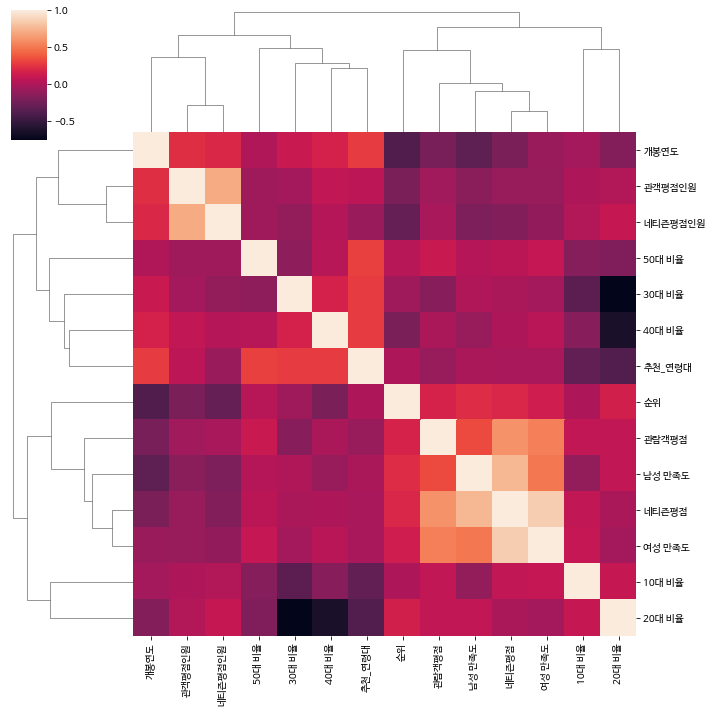

In [ ]:
sns.clustermap(df.corr())

In [ ]:
df1 = df[df['관객수'].notna()].reset_index()
del df1['index']

In [ ]:
e1_list=[]
for i in range(len(df1['영화명'])):
    e1 = float(df1['관객수'][i].replace(',',''))   
    e1_list.append(e1)
df1['관객수']=e1_list

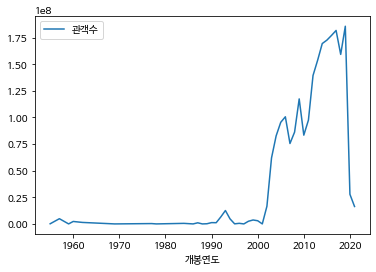

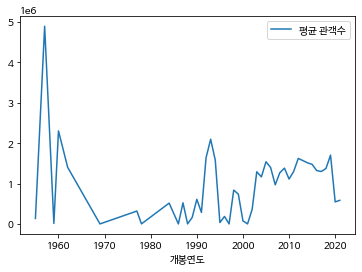

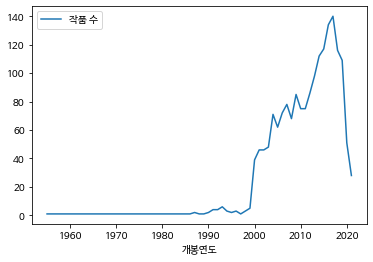

1,3번 그래프가 비슷하게 생김


In [ ]:
#### 개봉연도 별 누적관객수 비교

mv_year = df1[['개봉연도','관객수']]
mv_year = mv_year.groupby('개봉연도').sum()
mv_year.plot()
plt.show()

#### 개봉연도 별 평균관객수 비교

mv_year = df1[['개봉연도','관객수']]
mv_year2 = mv_year.groupby('개봉연도').mean()
mv_year2 = mv_year2.rename(columns={'관객수':'평균 관객수'})
mv_year2.plot()
plt.show()

### 개봉연도 별 작품 수
mv_year3 = mv_year.groupby('개봉연도').count()
mv_year3 = mv_year3.rename(columns={'관객수':'작품 수'})
mv_year3.plot()
plt.show()
print('1,3번 그래프가 비슷하게 생김')

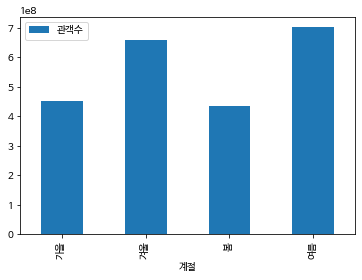

,관객수
계절,
가을,450946081.0
겨울,659444543.0
봄,434559189.0
여름,703210726.0


In [ ]:
### 계절에 따른 관객수 비교
mv_year = df1[['계절','관객수']]
mv_year = mv_year.groupby('계절').sum()
mv_year.plot(kind='bar')
plt.show()
mv_year.groupby('계절').sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


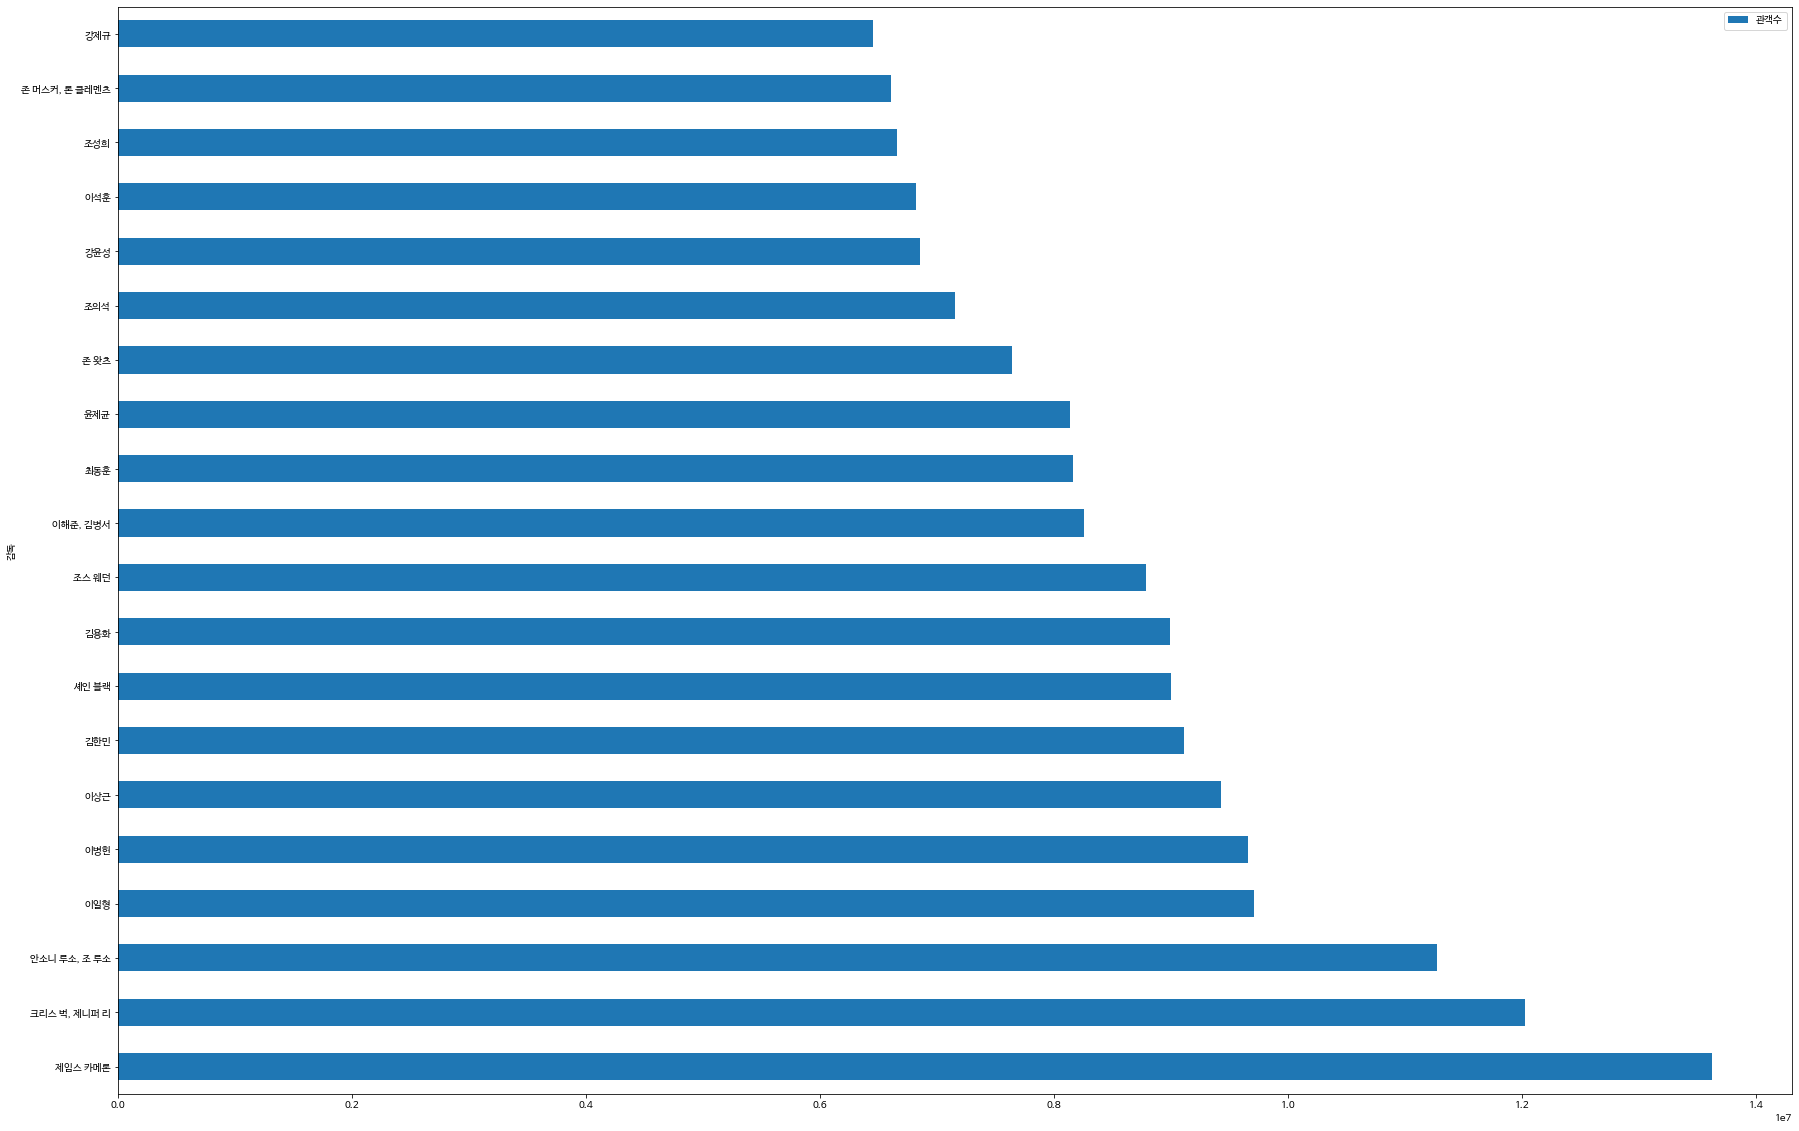

In [ ]:
## 감독별 영화 한 편의 평균 관람객 수 랭킹20 입니다
mv_year = df1[['감독','관객수']]
mv_year['관객수2'] = df1['관객수']
mv_year=mv_year.groupby('감독').agg({'관객수':'sum','관객수2':'count'})
mv_year['관객수']=round(mv_year['관객수']/mv_year['관객수2'],0)
del mv_year['관객수2']
mv_year = mv_year.sort_values('관객수',ascending=False).head(20)
mv_year.plot(kind='barh',figsize=(30,20))
plt.show()


In [ ]:
df1=df[['영화명','관객수','장르','영화_특징']]
df1 = df1[df1['영화_특징'].notna()]
df1

,영화명,관객수,장르,영화_특징
0,밥정,"15,650",다큐멘터리 드라마,스토리
1,가버나움,"142,622",드라마,연기
2,그린 북,"429,733",드라마,스토리
3,디지몬 어드벤처 라스트 에볼루션 : 인연,"4,739",애니메이션 모험,스토리
4,원더,"260,506",드라마,스토리
...,...,...,...,...
2162,차우,1799356.0,모험 스릴러 공포 코미디,연출
2163,목포는 항구다,1795700.0,코미디 액션,연기
2164,강철비2: 정상회담,1790797.0,드라마 액션,스토리
2165,아내가 결혼했다,1788748.0,멜로로맨스 드라마,"스토리, 연기"


In [146]:
df.sort_values('순위').head(50)

,순위,영화명,감독,등급,개봉일,장르,스토리,배우,관람객평점,관객평점인원,네티즌평점,네티즌평점인원,관객수,스크린수,블로그,한줄평,10대 비율,20대 비율,30대 비율,40대 비율,50대 비율,남성 만족도,여성 만족도,계절,개봉연도,추천_연령대,추천_성별,영화_특징,total
1473,1.0,명량,김한민,15세 관람가,20140730 개봉,액션 드라마,"- 1597년 임진왜란 6년, 오랜 전쟁으로 인해 혼란이 극에 달한 조선....","['최민식', '류승룡', '조진웅', '진구', '이정현', '김명곤', '권율'...",8.88,28836.0,8.44,66790.0,"17,613,682","1,587",전남 진도 명량해상케이블카 가 개통했다고 해서 가족들과 이순신장군의 명량해전으로 유...,1456 오늘 명량 시사회로 방금 보고 왔음. 단연코 올해의 수작임. 밑에 평...,7.0,43.0,25.0,19.0,5.0,7.46,9.08,여름,2014.0,20.0,남성,연기,전남 진도 명량해상케이블카 가 개통했다고 해서 가족들과 이순신장군의 명량해전으로 유...
1386,2.0,극한직업,이병헌,15세 관람가,20190123 개봉,코미디,낮에는 치킨장사! 밤에는 잠복근무!. 지금까지 이런 수사는 없었다! - 불철주야...,"['류승룡', '이하늬', '진선규', '이동휘', '공명', '신하균', '오정세...",9.20,15992.0,8.50,47550.0,"16,264,944","1,978",사용자의 안전과 건강을 최우선으로 생각하며 땀 흘리는 작업자들을 극한직업에서 만나봅...,1365 일단 진선규님께 박수갈채도 부족함 진짜 연기를 다양하게 잘하셔서 놀랐...,2.0,38.0,30.0,21.0,8.0,7.63,8.71,겨울,2019.0,20.0,여성,연기,사용자의 안전과 건강을 최우선으로 생각하며 땀 흘리는 작업자들을 극한직업에서 만나봅...
1974,3.0,신과함께-죄와 벌,김용화,12세 관람가,20210107 재개봉 20171220 개봉,판타지 드라마,"- 저승 법에 의하면, 모든 인간은 사후 49일 동안 7번의 재판을 거쳐야만 ...","['하정우', '차태현', '주지훈', '김향기', '김동욱', '마동석', '오달...",8.73,26313.0,7.83,57896.0,14410754.0,1912.0,NaN,NaN,5.0,45.0,25.0,19.0,5.0,6.39,7.90,겨울,2017.0,20.0,남성,연기,NaN
543,4.0,국제시장,윤제균,12세 관람가,20141217 개봉,드라마,‘가장 평범한 아버지의 가장 위대한 이야기’ - 1950년대 한국전쟁 이후로부터...,"['황정민', '김윤진', '오달수', '정진영', '장영남', '라미란', '김슬...",9.16,20347.0,9.02,41818.0,"14,245,998",966,국제시장 (2014) - 만 44세 1950년 한국전쟁 이후부터 지금까지 격동의 한...,535 영화내내 가족에게 잘해야겠다 생각이 들었다.우리 아버지는 날위해 모든것...,6.0,40.0,28.0,18.0,8.0,8.74,9.27,겨울,2014.0,20.0,남성,스토리,국제시장 (2014) - 만 44세 1950년 한국전쟁 이후부터 지금까지 격동의 한...
43,5.0,어벤져스: 엔드게임,"안소니 루소, 조 루소",12세 관람가,20190424 개봉,액션,- 인피니티 워 이후 절반만 살아남은 지구 마지막 희망이 된 어벤져스 먼저 ...,"['로버트 다우니 주니어', '크리스 에반스', '크리스 헴스워스', '마크 러팔로...",9.49,32116.0,9.38,69193.0,"13,934,592","2,835","스톤에 대한 대략적인 설명도 나오고 배경지식 알아야함 어벤져스 엔드게임, 2019 ...",42 마블 3000만큼 사랑합니다Avengers Assemble!I'm Iro...,4.0,46.0,29.0,17.0,3.0,9.20,9.50,봄,2019.0,20.0,남성,연출,"스톤에 대한 대략적인 설명도 나오고 배경지식 알아야함 어벤져스 엔드게임, 2019 ..."
1070,6.0,겨울왕국 2,"크리스 벅, 제니퍼 리",전체 관람가,20191121 개봉,애니메이션 모험 코미디 가족 판타지 뮤지컬,내 마법의 힘은 어디서 왔을까?. 나를 부르는 저 목소리는 누구지? - 어느 날...,"['크리스틴 벨', '이디나 멘젤', '조시 게드', '조나단 그로프', '스털링 ...",8.95,6031.0,8.70,23951.0,"13,747,792","2,648",6년이라는 오랜 시간 만에 속편으로 돌아온 겨울 왕국 2 (Frozen 2) 전편이...,1063 올라프의 1편요약이 기가맥힙니다크리스토퍼 뮤비에서 좀 흠칫함 미래가 ...,4.0,32.0,35.0,25.0,4.0,8.26,8.95,가을,2019.0,20.0,여성,영상미,6년이라는 오랜 시간 만에 속편으로 돌아온 겨울 왕국 2 (Frozen 2) 전편이...
439,7.0,아바타,제임스 카메론,12세 관람가,20180621 재개봉 20100904 재개봉 20091217 개봉,모험 액션 전쟁,- 지구 에너지 고갈 문제를 해결하기 위해 판도라 행성으로 향한 인류는 원주...,"['샘 워싱턴', '조 샐다나', '시고니 위버', '스티븐 랭', '미셸 로드리게...",NaN,0.0,9.07,40931.0,"13,624,328",912,오늘은 바이올라의 아바타가 인사를 드립니다. 초등맘 폴더에 글을 쓴지 너무 오래되어...,425 영화사인 한 획을 그은 영화스토리 전개 뻔할지도 몰라요 근데 좋음 스토...,NaN,NaN,NaN,NaN,NaN,9.08,9.06,겨울,2009.0,10.0,남성,영상미,오늘은 바이올라의 아바타가 인사를 드립니다. 초등맘 폴더에 글을 쓴지 너무 오래되어...
555,8.0,베테랑,류승완,15세 관람가,20150805 개봉,액션 드라마,"- 한 번 꽂힌 것은 무조건 끝을 보는 행동파 ‘서도철’(황정민), 20년 ...","['황정민', '유아인', '유해진', '오달수', '장윤주', '김시후', '오대...",9.24,22826.0,9.01,40910.0,"13,395,400","1,064",",베테랑 이모님 오셨다 임신하고나서 출산하고나서 양가 부모님이 멀리계시고 친정엄마는...","552 머야 이거 암살 보다 재미 있네황정민, 유해진, 오달수의 연기력도 대단...",4.0,49.0,26.0,16.0,5.0,8.32,9.17,여름,2015.0,20.0,여성,연기,",베테랑 이모님 오셨다 임신하고나서 출산하고나서 양가 부모님이 멀리계시고 친정엄마는..."
1220,9.0,괴물,봉준호,12세 관람가,20060727 개봉,모험 액션 스릴러 코미디 드라마 판타지,"한강, 가족, 그리고... (괴물) | 가족의 사투가 시작된다 | 한강에 괴물이 나...","['송강호', '변희봉', '박해일', '배두나', '고아성', '오달수', '이재...",NaN,0.0,8.62,39676.0,"13,019,740",0,"드라마, 괴물 - 스포있음 JTBC 2021.02.19. ~ 2021.04.10. ...",1163 뻔한 스토리로 뻔하지 않은 영화를 만들었다우리나라최고의괴수영화좀 똑똑...,NaN,NaN,NaN,NaN,NaN,8.27,8.99,여름,2006.0,10.0,여성,연출,"드라마, 괴물 - 스포있음 JTBC 2021.02.19. ~ 2021.04.10. ..."
1975,10.0,도둑들,최동훈,15세 관람가,20120725 개봉,범죄 액션 드라마,"10인의 도둑, 1개의 다이아몬드 그들이 움직이기 시작했다! - 한 팀으로 활동...","['김윤석', '김혜수', '이정재', '전지현', '임달화', '김해숙', '오달...",8.00,1.0,7.64,21010.0,12983330.0,1072.0,NaN,NaN,0.0,100.0,0.0,0.0,0.0,6.90,8.34,여름,2012.0,10.0,여성,연기,NaN


In [ ]:
## x1 = 연령 , x2 = 성별 , x3 = 장르, x4 = 특징
recommend()

In [137]:
dff = df.sort_values('순위').head(20)
ddfind = pd.Series(dff.index, index=dff['영화명'])
ind=ddfind[1]
new_total =df.loc[ind]['스토리']+df.loc[ind]['블로그']

In [ ]:
### okt안되는부분 해결
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
from konlpy.tag import Okt

In [ ]:
## recommend함수에 필요
kw = pd.read_csv('한글불용어100.txt', sep='\s+', header=None)
stopwords = set(kw[0])

In [145]:
def recommend(x1,x2,x3,x4,x5):
  
  df['스토리'] = df['스토리'].str.replace('\r','')
  cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
  df['블로그'] = df['블로그'].replace(cleanr,'')
  df['블로그'].iloc[0]
  dff = df.sort_values('순위').head(50)
  dff
  dffind = pd.Series(dff.index, index=dff['영화명'])
  dffind[x5-1]
  ind=ddfind[1]
  new_total =df.loc[ind]['스토리']+df.loc[ind]['블로그']      ###### 고른 영화 total 데이터
  
  mv_jang=df.drop(index=[231,388])
  mv_jang = mv_jang.reset_index()
  del mv_jang['index']
  ## 장르부분을 리스트화
  jang_list=[]
  for i in range(len(mv_jang['장르'])):
    j = mv_jang['장르'][i].split()
    jang_list.append(j)
  mv_jang['장르'] = jang_list
  j_list=[]
  ##네이버 영화에 장르가 몇종류 있는지 꺼내왔습니다.
  for i in range(len(mv_jang['장르'])):
    for j in range(5):
      try:
        j = mv_jang['장르'][i][j]
        if j in j_list:
          pass
        else:
          j_list.append(j)
      except:
        pass
  ## 더미변수 화
  mv_j=mv_jang
  for i in j_list:
    a=[]
    for k in range(len(mv_jang['장르'])):
      if i in mv_jang['장르'][k]:
        b=1
      else:
        b=0
      a.append(b)
    mv_j[i]=a
  ##영화특징 더미변수화
  sang_list=[]
  for i in range(len(mv_j['장르'])):
    try:
      j = mv_j['영화_특징'][i].split(', ')
    except:
      j = ''
    sang_list.append(j)
  mv_j['영화_특징'] = sang_list
  s_list=[]
  ##영화 특징이 몇종류 있는지 꺼내왔습니다.
  for i in range(len(mv_j['장르'])):
    for j in range(5):
      try:
        j = mv_j['영화_특징'][i][j]
        if j in s_list:
          pass
        else:
          s_list.append(j)
      except:
        pass
  mv_s=mv_j
  for i in s_list:
    a=[]
    for k in range(len(mv_j['영화_특징'])):
      if i in mv_j['영화_특징'][k]:
        b=1
      else:
        b=0
      a.append(b)
    mv_s[f'특:{i}']=a
  del mv_s['특:']
  a_ = mv_s[mv_s['추천_연령대']==x1] 
  b_ = a_[a_['추천_성별']==x2]
  c_ = b_[b_[f'특:{x3}']==1]
  d_ = c_[c_[x4]==1]
  d_ = d_[d_['스토리'].notna()]
  d_ = d_[d_['블로그'].notna()]
  d_ = d_.reset_index()
  del d_['index']
  d_['total'] = d_['스토리'] + d_['블로그']
  ddl = []
  for s in d_['total']:
    morphs = okt.morphs(s, stem=True)
    temp_str = ' '.join(word for word in morphs if word not in stopwords)
    ddl.append(temp_str)
  d_['total']=ddl
  d2 = pd.DataFrame(d_['total'])
  d2 = d2.append({'total':new_total},ignore_index=True)
  d2['total'] ### len(d2)-1 추가된 데이터 인덱스
  tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0)
  tfidf_matrix = tf.fit_transform(d2['total'])
  cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
  indices = pd.Series(d_.index, index=d_['영화명'])
  idx = len(d2)-1 # 영화명에 해당하는 인덱스
  sim_scores = list(enumerate(cosine_sim[idx])) # 해당 인덱스의 cosine_sim 추출
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # 추출한 cosine_sim을 정렬
  sim_scores = sim_scores[1:4] # 상위 30개만 추출
  movie_indices = [i[0] for i in sim_scores]
  return d_.iloc[movie_indices]

In [14]:
recommend(a,b,c,d)

,순위,영화명,감독,등급,개봉일,장르,스토리,배우,관람객평점,관객평점인원,네티즌평점,네티즌평점인원,관객수,스크린수,블로그,한줄평,10대 비율,20대 비율,30대 비율,40대 비율,50대 비율,남성 만족도,여성 만족도,계절,개봉연도,추천_연령대,추천_성별,영화_특징,다큐멘터리,드라마,애니메이션,모험,코미디,전쟁,멜로로맨스,공연실황,판타지,액션,스릴러,범죄,가족,뮤지컬,미스터리,공포,서부,한국,서사,느와르,서스펜스,에로,특:스토리,특:연기,특:영상미,특:연출,특:OST,특:모든면에
25,NaN,매트릭스,"릴리 워쇼스키, 라나 워쇼스키",12세 관람가,20190925 재개봉 20160922 재개봉 19990515 개봉,[액션],"서기 2199년,\r. 인공지능 AI에 의해 인류가 재배되고 있다! - 인간의 ...","['키아누 리브스', '로렌스 피시번', '캐리 앤 모스', '휴고 위빙', '글로...",9.63,8.0,9.41,5004.0,NaN,NaN,침대<b>매트릭스</b>를 최근에 바꾸게 되었어요 평소에 침대<b>매트릭스</b>에...,30 완벽에 가까운 정말 훌륭한 영화.전무후무할 최고의 영화가상현실이 배경인 ...,0.0,38.0,25.0,38.0,0.0,9.44,9.31,봄,1999.0,20.0,남성,[스토리],0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
50,NaN,서유기 2 - 선리기연,유진위,15세 관람가,20100601 개봉,"[코미디, 액션, 모험, 판타지, 멜로로맨스]",- <서유기 월광보합>의 완결편. 지존보는 500년전의 세계로 와서 자하란 ...,"['주성치', '주인', '나가영', '유진위', '남결영', '채소분', '막문위...",NaN,0.0,9.37,3943.0,NaN,NaN,"그래도 매일밤 의무적으로 넷플릭스를 유영하는데, 뭔가 땡기는 게 없었지만 그래도 그...",50 난 개인적 으로 손오공 머리에 금고아가 조여올때 자하선사를 놓치면서 고통...,NaN,NaN,NaN,NaN,NaN,9.45,8.78,여름,2010.0,20.0,남성,[스토리],0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
84,4565.0,아이언 자이언트,브래드 버드,전체 관람가,20191009 재개봉 200005 개봉,"[애니메이션, 액션, 가족]","“I go, you stay. No following” - 작은 시골마을의 외톨...","['제니퍼 애니스톤', '빈 디젤', '엘리 마리엔탈', '크리스토퍼 맥도날드', ...",9.47,15.0,9.33,2076.0,"9,802",167,몇일 전 우연히 만도에서 출시된 <b>아이언 자이언트</b>의 리뷰를 보고 급 뽐뿌...,81 젠장 내가 로봇 하나때문에 울다니 ㅜㅜ진짜 감동이다이건...평점이 왜이리...,0.0,53.0,20.0,27.0,0.0,9.25,9.59,봄,2000.0,20.0,남성,[스토리],0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
109,NaN,록키,존 G. 아빌드센,12세 관람가,20171129 재개봉 19770611 개봉,"[드라마, 액션]",“져도 상관없어. 내가 원하는 건 끝까지 버텨보는 거야” - 필라델피아 뒷골목 ...,"['실베스터 스탤론', '탈리아 샤이어', '버트 영', '칼 웨더스', '버제스 ...",8.80,5.0,9.31,1268.0,NaN,NaN,"그다음날 아침, 조식이 다 테이크아웃으로 할 수 있게 되어있다 그래서 맛나게 먹고 ...",118 퇴짜를 맞고 밤길을 쓸쓸히 돌아가는 76세의 트레이너를 잠시후 뒤쫓아가...,20.0,20.0,40.0,20.0,0.0,9.33,9.41,여름,1977.0,20.0,남성,[스토리],0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
136,NaN,동방불패,"정소동, 당계례",15세 관람가,20131218 재개봉 19920325 개봉,"[액션, 드라마]",- 사부의 위선에 실망한 수제자 영호충은 추동자들과 유랑길에 오르며 일원신교...,"['이연걸', '임청하', '관지림', '이가흔', '이자웅', '원결영']",NaN,0.0,9.29,1329.0,NaN,NaN,김용 작가의 원작 무협지 <b>동방불패</b> 세계관을 기반으로 한 휴대폰게임추천 ...,134 임청하 저 떄 미모로는 김태희도 처바른다 진짜 ㄷㄷ;이젠 이런영화 못만...,NaN,NaN,NaN,NaN,NaN,9.26,9.46,봄,1992.0,20.0,남성,[스토리],0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
166,NaN,브레이브하트,멜 깁슨,15세 관람가,19950617 개봉,"[액션, 드라마, 전쟁]","누가 감히 영웅을 심판하는가? - {1280년, 스코틀랜드... 윌리엄 월레스...","['멜 깁슨', '소피 마르소', '패트릭 맥구한', '캐서린 맥코맥', '앵거스 ...",NaN,0.0,9.27,2382.0,NaN,NaN,영화 <b>브레이브 하트</b>의 윌리엄 월레스 멜 깁슨의 최고 전성기라고 할 수 ...,159 뭐 말이 필요합니까?? 글래디에이터가 원석이라면 브레이브하트는 보석내 ...,NaN,NaN,NaN,NaN,NaN,9.31,9.16,여름,1995.0,20.0,남성,[스토리],0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
200,17349.0,마이너리티 리포트,스티븐 스필버그,15세 관람가,20020726 개봉,"[드라마, 미스터리, 범죄, 액션]","톰 크루즈, 스티븐 스필버그 감독 - 2054년 워싱턴, 범죄가 일어나기 전 범...","['톰 크루즈', '콜린 파렐', '사만다 모튼', '막스 폰 시도우']",NaN,0.0,9.24,2629.0,0,0,팔란티어 테크놀로지스 (PLTR US) : 현실판 <b>마이너리티 리포트</b> ...,194 와 이게 이천이년에 만든거라니...2002년 초등학교6학년때 아빠손잡고...,NaN,NaN,NaN,NaN,NaN,9.15,9.50,여름,2002.0,20.0,남성,[스토리],0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
212,631.0,벤허,윌리엄 와일러,전체 관람가,20190328 재개봉 20160707 재개봉 20080401 재개봉 2007061...,"[드라마, 액션, 모험, 멜로로맨스]","역사상 가장 위대한 걸작!\r. 경주는 시작일 뿐이다! - 로마 제국 시대, 예...","['잭 휴스턴', '모건 프리먼', '토비 켑벨', '로드리고 산토로', '나자닌 ...",9.36,2543.0,9.23,4986.0,"1,399,771",717,BNHR <b>벤허</b>커피에 가보기로 했다. 원래 한남동이 본점이고 2호점을 낸...,232 종교적 관점을 떠나서라도 이영 화는 걸작이다시대를 뛰어넘는 명작. 이...,1.0,36.0,18.0,22.0,23.0,9.08,9.61,겨울,1962.0,20.0,남성,[스토리],0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
255,18.0,태극기 휘날리며,강제규,15세 관람가,20210317 재개봉 20040205 개봉,"[전쟁, 드라마, 액션]",“우린 반드시 살아서 돌아가야해” - 가족의 생계를 책임지기 위해 열심히 살아가...,"['장동건', '원빈', '이은주', '공형진', '장민호', '이영란']",NaN,0.0,9.21,10891.0,"11,746,135",0,받는 '<b>태극기 휘날리며</b>'라는 영화가 있답니다 비록 오래 된 영화이지만 ...,249 중학교때 처음보고 제일 많이 울었던 영화다. 9년이 지나고 대학을 졸업...,NaN,NaN,NaN,NaN,NaN,9.14,9.40,겨울,2004.0,20.0,남성,[스토리],0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
262,NaN,서유기 - 월광보합,유진위,15세 관람가,20

In [35]:
x1= 20
x2= '남성'
x3='스토리'
x4='액션'

In [1]:
### okt안되는부분 해결
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [15]:
from konlpy.tag import Okt
okt = Okt()

In [20]:
kw = pd.read_csv('한글불용어100.txt', sep='\s+', header=None)
stopwords = set(kw[0])

In [25]:
df['스토리'] = df['스토리'].str.replace('\r','')

In [27]:
cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
df['블로그'] = df['블로그'].replace(cleanr,'')
df['블로그'].iloc[0]

'그 시작종을 알린 영화 밥정. 임지호 선생님의 자전적인 이야기가 가득 담긴, 다큐멘터리 영화를 보며, 내 마음에도 위안이 찾아들고, 평안이 내려 앉는 기분이 들었다. 늘 떠나온곳을 그리워 하는 내 마음과... , 이번 추석 연휴에 우연히 보게 된 영화 ‘밥정(2018)’은 사람이 살아가면서 제일 많이 하는 ‘늦은... 무엇이고, 또 ‘늦은 후회’는 참 부질없다는 것을 알려준 영화 ‘밥정(2018)’ 감상기였습니다. 개인 평점 3/5, 밥정 감독 박혜령 출연 임지호 개봉 2020. 10. 07. 주부 코스프레 한다고 종종거린 시간이 마무리 되자 영화 밥정이 생각났다. 개봉 당시부터 보려고 찜해둔 영화. 코로나다 뭐다 하면서 차일피일 미루다가... , 밥정 감독 박혜령 출연 임지호 개봉 2020. 03. 05. 예전에 TV에 [식사하셨어요?]라는 프로그램이... 하지만 알고봐도 괜찮을것 같습니다* 영화[밥정]에서 자연을 재료삼아 요리를 만드는 방랑식객 임지호쉐프는... , 밥정이 무슨 뜻인가 했더니 밥으로 정을 나누다 라는 의미였네요. 심플하면서도 정감이 가는 이름이었습니다. 내부에는 양옆으로 테이블이 일정한 간격으로 배치되어 있었는데 세로로 놓여 있어 시각적으로... , 안성애견동반식당 밥정 031-653-7171 경기도 안성기 공도읍 가족공원길 6 펠리스뻬로 애견카페를 갔다가~ 애견동반식당인 밥정에 다녀왔어요! 펠리스뻬로 파크점 링크는 걸어둘게요 :) 주차는 맞은편... , 임지호님이 어제 별세하셨다고.....ㅠㅠ 작년 10월, 영화관에서 #밥정 다큐보고 썼던 인스타리뷰를... 확인 할수 있는 #다큐멘터리 #밥정 극장에서 보시길 권합니다. #무비버스커 #베스트아시아다큐멘터리 #방랑식객, 저도 고민을 하다가 찾아간곳 대림동산에 위치한 밥정을 소개해 드릴께요~ 031-653-7171 경기도 안성시 공도읍 가족공원길 6 가족공원 바로 앞에 있어요~ 내부모습~ 마당에는 삽살개?로 추정되는 댕댕이... , 영화 소개밥정 제목 : 밥정 시간 : 82분 개봉 : 2020

In [32]:
s = df['블로그'][0] + df['스토리'][0]
morphs = okt.morphs(s, stem=True)
temp_str = ' '.join(word for word in morphs if word not in stopwords)
temp_str

'시 작 종 을 알리다 영화 밥정 . 임지호 선생님 의 자전 인 이야기 가득 담기다 , 다큐멘터리 영화 를 보다 , 마음 에도 위안 찾다 아들 고 , 평안 내다 앉다 기분 들다 . 늘 떠나오다 곳 을 그립다 하다 마음 과 ... , 이번 추석 연휴 에 우연히 보다 되다 영화 ‘ 밥정 ( 2018 )’ 은 살아가다 제일 많이 하다 ‘ 늦다 ... 무엇 이고 , ‘ 늦다 후회 ’ 늘다 차다 부질없다 을 알다 준 영화 ‘ 밥정 ( 2018 )’ 감상 기다 . 개인 평점 3/5 , 밥정 감독 박혜령 출연 임지호 개봉 2020 . 10 . 07 . 주부 코스프레 하다 종종 거린 마무리 되다 영화 밥 정이 생각나다 . 개봉 당시 부터 보다 찜 하다 두다 영화 . 코로나 다 뭐 다 하다 차일피일 미루다 ... , 밥정 감독 박혜령 출연 임지호 개봉 2020 . 03 . 05 . 예전 에 TV 에 [ 식사 하다 ?] 라는 프로그램 ... 하지만 고 보다 괜찮다 같다 * 영화 [ 밥정 ] 에서 자연 을 재료 삼다 요리 를 만들다 방랑 식객 임지호 쉐프 는 ... , 밥 정이 무슨 뜻 인가 하다 밥 으로 정 을 나누다 라는 의미 이다 . 심플 하다 정감 가다 이르다 . 내부 에는 양옆 으로 테이블 일정하다 간격 으로 배치 되어다 있다 세로 로 놓이다 있다 시각 으로 ... , 안성 애견 동 반 식당 밥정 031-653 - 7171 경기도 안성기 공도읍 가족 공원 길 6 펠리스뻬 로 애견 카페 를 가다 ~ 애견 동 반 식당 인 밥정 에 다녀오다 ! 펠리스뻬 로 파크 링크 는 걸다 두다 :) 주차 는 맞은편 ... , 임지호 님 어제 별세 하다 ..... ㅠㅠ 작년 10월 , 영화관 에서 #밥정 다큐 보고 써다 인스타 리뷰 를 ... 확인 하다 있다 #다큐멘터리 #밥정 극장 에서 보다 권하다 . #무비버스커 #베스트아시아다큐멘터리 #방랑식객 , 저 도 고민 을 하다 찾아가다 곳 대림 동산 에 위치 밥정 을 소개 하다 드리다 ~ 031-653 - 7171 경기도 안성시 공도읍 가족 

In [ ]:
nmd['total_transformed'] = total_str_list
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(nmd['total_transformed'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
titles = df['영화명']
indices = pd.Series(nmd.index, index=df['영화명'])

In [53]:
d_ = d_[d_['스토리'].notna()]
d_ = d_[d_['블로그'].notna()]
d_ = d_.reset_index()
del d_['index']
d_['total'] = d_['스토리'] + d_['블로그']
ddl = []
for s in d_['total']:
  morphs = okt.morphs(s, stem=True)
  temp_str = ' '.join(word for word in morphs if word not in stopwords)
  ddl.append(temp_str)

In [139]:
d2 = pd.DataFrame(d_['total'])
d2 = d2.append({'total':new_total},ignore_index=True)
d2['total'] ### len(d2)-1 추가된 데이터 인덱스

'낮에는 치킨장사! 밤에는 잠복근무!. 지금까지 이런 수사는 없었다!  -  불철주야 달리고 구르지만 실적은 바닥, 급기야 해체 위기를 맞는 마약반! 더 이상 물러설 곳이 없는 팀의 맏형 고반장은 국제 범죄조직의 국내 마약 밀반입 정황을 포착하고 장형사, 마형사, 영호, 재훈까지 4명의 팀원들과 함께 잠복 수사에 나선다. 마약반은 24시간 감시를 위해 범죄조직의 아지트 앞 치킨집을 인수해 위장 창업을 하게 되고, 뜻밖의 절대미각을 지닌 마형사의 숨은 재능으로 치킨집은 일약 맛집으로 입소문이 나기 시작한다. 수사는 뒷전, 치킨장사로 눈코 뜰 새 없이 바빠진 마약반에게 어느 날 절호의 기회가 찾아오는데…  범인을 잡을 것인가, 닭을 잡을 것인가!사용자의 안전과 건강을 최우선으로 생각하며 땀 흘리는 작업자들을 극한직업에서 만나봅니다! 2021년... 작업자들을 극한직업에서 소개합니다. EBS 극한직업  나만의 건강 도우미, 안마의자와 이동식 구들방... , EBS #극한직업 은 극한의 직업에 종사하는 사람들의 삶을 밀착 촬영하여 생생하게 보여줌으로써 역경을 극복하고 살아가고자 하는 사람들의 숭고한 의지와 잃어가고 있는 직업정신의 가치를 되돌아보는... , 극한직업 43년 구들장인 강종근 이동식 구들방 제작 업체 위치 연락처 시공비용 알아보기 EBS 극한직업 나만의 건강 도우미, 안마의자와 이동식 구들방 EBS 극한직업에서는 사용자의 안전과 건강을 최우선으로... , 극한 직업 © adamsky1973, 출처 Unsplash 코로나19환자 갑질 폭언에 대한 글을 보게 되었습니다. 코로나19병 등 의료진 들은 일단 감연에 대한 공포 한여름 더위에 땀과 더위로 지쳐가고 있습니다. 환자와 환자... , 이번에 #극한직업 에서 방영된 #농막 용 #강종근 의 #휴심황토건축 #이동식황토구들방 을 사진으로... #강원도 #정선 에 설치한 제품입니다.설치도 #극한직업 입니다. 외부의 관리를 편히 하고자 징크나... , #극한직업 #극한직업예고 #극한직업재방송 #극한직업출연자 #직업

In [140]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0)
tfidf_matrix = tf.fit_transform(d2['total'])
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [144]:

indices = pd.Series(d_.index, index=d_['영화명'])
idx = len(d2)-1 # 영화명에 해당하는 인덱스
sim_scores = list(enumerate(cosine_sim[idx])) # 해당 인덱스의 cosine_sim 추출
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # 추출한 cosine_sim을 정렬
sim_scores = sim_scores[1:4] # 상위 30개만 추출
movie_indices = [i[0] for i in sim_scores]
d_.iloc[movie_indices]

,순위,영화명,감독,등급,개봉일,장르,스토리,배우,관람객평점,관객평점인원,네티즌평점,네티즌평점인원,관객수,스크린수,블로그,한줄평,10대 비율,20대 비율,30대 비율,40대 비율,50대 비율,남성 만족도,여성 만족도,계절,개봉연도,추천_연령대,추천_성별,영화_특징,total,다큐멘터리,드라마,애니메이션,모험,코미디,전쟁,멜로로맨스,공연실황,판타지,액션,스릴러,범죄,가족,뮤지컬,미스터리,공포,서부,한국,서사,느와르,서스펜스,에로,특:스토리,특:연기,특:영상미,특:연출,특:OST,특:모든면에
36,17158.0,고,유키사다 이사오,15세 관람가,20011123 개봉,"[드라마, 액션, 코미디]",우리들의 유쾌하고 통쾌한 쿨 러브 스토리. 난 일본에서 태어났다. 소위 말하는 코리...,"['쿠보즈카 요스케', '시바사키 코우', '오타케 시노부', '야마자키 츠토무',...",NaN,0.0,8.68,845.0,0,0,타카라에서 나온 초합금 자이언트 고그다. 언제 샀는지도 기억 안 날 정도로 오래전에...,1067 훌륭한 원작을 훌륭하게 영화화 했다. 원작의 메세지를 잃지 않는 연출...,NaN,NaN,NaN,NaN,NaN,8.53,9.06,가을,2001.0,20.0,남성,[스토리],의 유쾌하다 통쾌하다 쿨 러브 스토리 . 난 일본 에서 태어나다 . 소위 하다 코리...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,NaN,록키,존 G. 아빌드센,12세 관람가,20171129 재개봉 19770611 개봉,"[드라마, 액션]",“져도 상관없어. 내가 원하는 건 끝까지 버텨보는 거야” - 필라델피아 뒷골목 ...,"['실베스터 스탤론', '탈리아 샤이어', '버트 영', '칼 웨더스', '버제스 ...",8.8,5.0,9.31,1268.0,NaN,NaN,"그다음날 아침, 조식이 다 테이크아웃으로 할 수 있게 되어있다 그래서 맛나게 먹고 ...",118 퇴짜를 맞고 밤길을 쓸쓸히 돌아가는 76세의 트레이너를 잠시후 뒤쫓아가...,20.0,20.0,40.0,20.0,0.0,9.33,9.41,여름,1977.0,20.0,남성,[스토리],“ 지다 상관없다 . 원하다 건 끝 까지 버티다 보다 거야 ” - 필라델피아 뒷골목...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14,9159.0,얼라이브,프랭크 마샬,15세 관람가,19930424 개봉,"[드라마, 모험, 액션, 스릴러]","- 1972년 10월 13일 금요일 오후, 최대의 참사가 일어난다. 우루과이...","['에단 호크', '빈센트 스파노', '조쉬 해밀턴', '샘 베렌즈', '데이비드 ...",NaN,0.0,9.06,729.0,130,1,"강릉 3박4일 여행/ 내가 방문했던 장소: 얼라이브홈,교동짬뽕본점, 버드나무브루어리...",460 이영화 10번넘게봣다근데 의과대생 매시닮은거 잊을수 없다돈도 죽음앞에선...,NaN,NaN,NaN,NaN,NaN,8.96,9.39,봄,1993.0,20.0,남성,[스토리],"- 1972년 10월 13일 금요일 오후 , 최대 의 참사 일어난다 . 우루과이 대...",0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [147]:
  mv_jang=df.drop(index=[231,388])
  mv_jang = mv_jang.reset_index()
  del mv_jang['index']
  ## 장르부분을 리스트화
  jang_list=[]
  for i in range(len(mv_jang['장르'])):
    j = mv_jang['장르'][i].split()
    jang_list.append(j)
  mv_jang['장르'] = jang_list
  j_list=[]
  ##네이버 영화에 장르가 몇종류 있는지 꺼내왔습니다.
  for i in range(len(mv_jang['장르'])):
    for j in range(5):
      try:
        j = mv_jang['장르'][i][j]
        if j in j_list:
          pass
        else:
          j_list.append(j)
      except:
        pass
  ## 더미변수 화
  mv_j=mv_jang
  for i in j_list:
    a=[]
    for k in range(len(mv_jang['장르'])):
      if i in mv_jang['장르'][k]:
        b=1
      else:
        b=0
      a.append(b)
    mv_j[i]=a
  ##영화특징 더미변수화
  sang_list=[]
  for i in range(len(mv_j['장르'])):
    try:
      j = mv_j['영화_특징'][i].split(', ')
    except:
      j = ''
    sang_list.append(j)
  mv_j['영화_특징'] = sang_list
  s_list=[]
  ##영화 특징이 몇종류 있는지 꺼내왔습니다.
  for i in range(len(mv_j['장르'])):
    for j in range(5):
      try:
        j = mv_j['영화_특징'][i][j]
        if j in s_list:
          pass
        else:
          s_list.append(j)
      except:
        pass
  mv_s=mv_j
  for i in s_list:
    a=[]
    for k in range(len(mv_j['영화_특징'])):
      if i in mv_j['영화_특징'][k]:
        b=1
      else:
        b=0
      a.append(b)
    mv_s[f'특:{i}']=a
  del mv_s['특:']
  a_ = mv_s[mv_s['추천_연령대']==x1] 
  b_ = a_[a_['추천_성별']==x2]
  c_ = b_[b_[f'특:{x3}']==1]
  d_ = c_[c_[x4]==1]

In [151]:
###### 영화 특징
s_list

['스토리', '연기', '영상미', '연출', 'OST', '모든면에']

In [153]:
###### 장르
jjjj = pd.DataFrame(j_list)
jjjj

,0
0,다큐멘터리
1,드라마
2,애니메이션
3,모험
4,코미디
5,전쟁
6,멜로로맨스
7,공연실황
8,판타지
9,액션


In [150]:
mv_s

,순위,영화명,감독,등급,개봉일,장르,스토리,배우,관람객평점,관객평점인원,네티즌평점,네티즌평점인원,관객수,스크린수,블로그,한줄평,10대 비율,20대 비율,30대 비율,40대 비율,50대 비율,남성 만족도,여성 만족도,계절,개봉연도,추천_연령대,추천_성별,영화_특징,total,다큐멘터리,드라마,애니메이션,모험,코미디,전쟁,멜로로맨스,공연실황,판타지,액션,스릴러,범죄,가족,뮤지컬,미스터리,공포,서부,한국,서사,느와르,서스펜스,에로,특:스토리,특:연기,특:영상미,특:연출,특:OST,특:모든면에
0,4029.0,밥정,박혜령,전체 관람가,20201007 개봉,"[다큐멘터리, 드라마]",그리움으로 짓고 진심으로 눌러 담아 정성껏 차린 한상차림. 밥으로 정을 나누는 인생...,['임지호'],9.70,20.0,9.63,350.0,"15,650",182,"그 시작종을 알린 영화 밥정. 임지호 선생님의 자전적인 이야기가 가득 담긴, 다큐멘...",0 그리움 이라는걸 제 멋대로 상상해보니 감당이 안됩니다. 저는 그리움을 찾...,5.0,35.0,25.0,15.0,20.0,9.46,9.88,가을,2020.0,40.0,여성,[스토리],"그 시작종을 알린 영화 밥정. 임지호 선생님의 자전적인 이야기가 가득 담긴, 다큐멘...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2165.0,가버나움,나딘 라바키,15세 관람가,20190124 개봉,[드라마],"- 나를 세상에 태어나게 한 ""부모님을 고소하고 싶어요..."" -출생기록조...","['자인 알 라피아', '요르다노스 시프로우', '보루와티프 트레저 반콜', '나딘...",9.54,1394.0,9.59,3417.0,"142,622",111,영화 가버나움에 대해 여러분들에게 소개해드리고자 주간 인권영화의 첫 시작으로 가져와...,"2 멋진차, 고급아파트를 가질수 없어 가난이 나쁜게 아니다. 가난은 그것으로 ...",2.0,37.0,29.0,15.0,17.0,9.29,9.86,겨울,2019.0,20.0,여성,[연기],영화 가버나움에 대해 여러분들에게 소개해드리고자 주간 인권영화의 첫 시작으로 가져와...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1370.0,그린 북,피터 패럴리,12세 관람가,20190109 개봉,[드라마],언제 어디서든 바른 생활! 완벽한 천재 뮤지션 ‘돈 셜리’. 원칙보다 반칙! 다혈질...,"['비고 모텐슨', '마허샬라 알리', '린다 카델리니', '세바스찬 매니스캘코',...",9.55,2072.0,9.59,7544.0,"429,733",398,오늘은 영화 '그린북'을 12단계로 분석해보려고 하는데요~ 그린북은 1962년 미국...,1 폭설내리는밤 경찰이 두번째로 주인공이 몰고가는 차를 세웠을때 우린 경찰의 ...,0.0,30.0,29.0,17.0,23.0,9.51,9.79,겨울,2019.0,30.0,남성,[스토리],오늘은 영화 '그린북'을 12단계로 분석해보려고 하는데요~ 그린북은 1962년 미국...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5416.0,디지몬 어드벤처 라스트 에볼루션 : 인연,타구치 토모히사,12세 관람가,20210217 개봉,"[애니메이션, 모험]",- 컴퓨터 모니터를 통해 세상 밖으로 나온 의문의 알. 타이치와 히카리 남매...,"['하나에 나츠키', '호소야 요시마사', '사카모토 치카', '야마구치 마유미',...",NaN,0.0,9.54,836.0,"4,739",70,익숙한 디지몬들과 성장해버렸지만 친구 같은 주인공들 덕분에 자연스럽게 웃음이 번졌다...,3 트라이때는 진짜 아무 감정도 없이 그저 심각하기만 하고 노잼으로 봤었는데 ...,NaN,NaN,NaN,NaN,NaN,9.43,9.87,겨울,2021.0,20.0,남성,[스토리],익숙한 디지몬들과 성장해버렸지만 친구 같은 주인공들 덕분에 자연스럽게 웃음이 번졌다...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1729.0,원더,스티븐 크보스키,전체 관람가,20210211 재개봉 20171227 개봉,[드라마],"“넌 못생기지 않았어, 네게 관심있는 사람은 알게 될 거야”. 헬멧 속에 숨었던 아...","['제이콥 트렘블레이', '줄리아 로버츠', '오웬 윌슨', '이자벨라 비도빅', ...",9.43,319.0,9.53,3740.0,"260,506",183,그래서 원더우먼 보기를 잘했단 생각이 들었답니다. 서평지청 출신의 서연주는 악으로 ...,"4 ""힘겨운 싸움을 하는 모든 이들에게 친절하라.""아이가 태어 난다면 잭윌 같...",2.0,34.0,27.0,29.0,8.0,9.22,9.80,겨울,2017.0,20.0,여성,[스토리],그래서 원더우먼 보기를 잘했단 생각이 들었답니다. 서평지청 출신의 서연주는 악으로 ...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,494.0,차우,신정원,12세 관람가,20090715 개봉,"[모험, 스릴러, 공포, 코미디]",괴수 어드벤처 (차우) | 식인 멧돼지 VS 5인의 추격대 그들의 사투가 시작된다!...,"['엄태웅', '정유미', '장항선', '윤제문', '박혁권', '김기천', '장유...",NaN,0.0,7.58,6843.0,1799356.0,397.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.99,8.34,여름,2009.0,10.0,여성,[연출],NaN,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2161,496.0,목포는 항구다,김지훈,15세 관람가,20040220 개봉,"[코미디, 액션]",불멸의 형님 도시 | 당당하게 남자답게 한판 붙자! - 아마추어 서울 형사 이수...,"['조재현', '차인표', '송선미', '손병호', '박철민', '김일우', '최덕...",NaN,0.0,6.89,723.0,1795700.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.82,7.15,겨울,2004.0,20.0,남성,[연기],NaN,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2162,497.0,강철비2: 정상회담,양우석,15세 관람가,20200729 개봉,"[드라마, 액션]","남북미 정상회담 중, 북한 내 쿠데타로 세 정상이 납치된다! - 북미 평화협정 ...","['정우성', '곽도원', '유연석', '앵거스 맥페이든', '신정근', '류수영'...",7.96,975.0,4.99,18049.0,1790797.0,2137.0,NaN,NaN,3.0,34.0,31.0,23.0,10.0,4.26,6.01,여름,2020.0,40.0,남성,[스토리],NaN,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2163,499.0,아내가 결혼했다,정윤수,청소년 관람불가,20081023 개봉,"[멜로로맨스, 드라마]",나를 두고... 또! (아내가 결혼했다) | 자신있어? 평생 한 사람만 사랑할 자신...,"['손예진', '김주혁', '주상욱', '김병춘', '천성훈']",NaN,0.0,5.07,5325.0,1788748.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.06,6.50,가을,2008.0,20.0,여성,"[스토리, 연기]",NaN,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0